## 1.简介<br>
Auto MPG 数据集是一个关于汽车燃油效率的经典数据集，包含了各种不同型号的汽车的多个特征，主要关注汽车燃油效率（每加仑英里数，MPG）以及与之相关的属性。
本文按照从简入繁的节奏，一步步添加完善绘图；利用散点图可视化分析MPG和三个重要变量Displacement(发动机总排量)、Horsepower(马力)和Weight(汽车重量)的关系。
<br>
首先要导入需要的软件包：
- pandas：导入数据集，分析数据
- plotnine：完成绘图
- numpy：完成基本的科学计算
- warning：设置，忽视警告


In [46]:
import numpy as np
import pandas as pd
import plotnine
plotnine .options .figure_size=(7.5, 4.2)
from plotnine import *
import warnings
warnings.filterwarnings("ignore")

## 2.导入数据集并进行数据清理
(1)用pandas的read_csv方法导入；导入后要进行数据清理，删除所有有缺省的数据，先将为?的值换为pd.NA，再进行丢弃。

In [47]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
data = pd.read_csv(url, delim_whitespace=True, names=column_names)
data = data.replace('?', pd.NA)
data = data.dropna()
print(len(data))

392


(2)根据pandas的drop功能，除MPG，只保留其中的Displacement(发动机总排量)、Horsepower(马力)和Weight(汽车重量)这三列；并查看数据集前几行。

In [48]:
selected_columns = ['MPG','Displacement', 'Weight','Horsepower']
mpg = data.loc[:, selected_columns]
print(mpg.head())

    MPG  Displacement  Weight Horsepower
0  18.0         307.0  3504.0      130.0
1  15.0         350.0  3693.0      165.0
2  18.0         318.0  3436.0      150.0
3  16.0         304.0  3433.0      150.0
4  17.0         302.0  3449.0      140.0


## 3.预览数据集并进一步处理
(1)首先是利用ggplot画一个简单的柱形图，查看MPG的值分布。能看到，MPG数据集还是比较均匀的，大多数数值处于12-38之间。

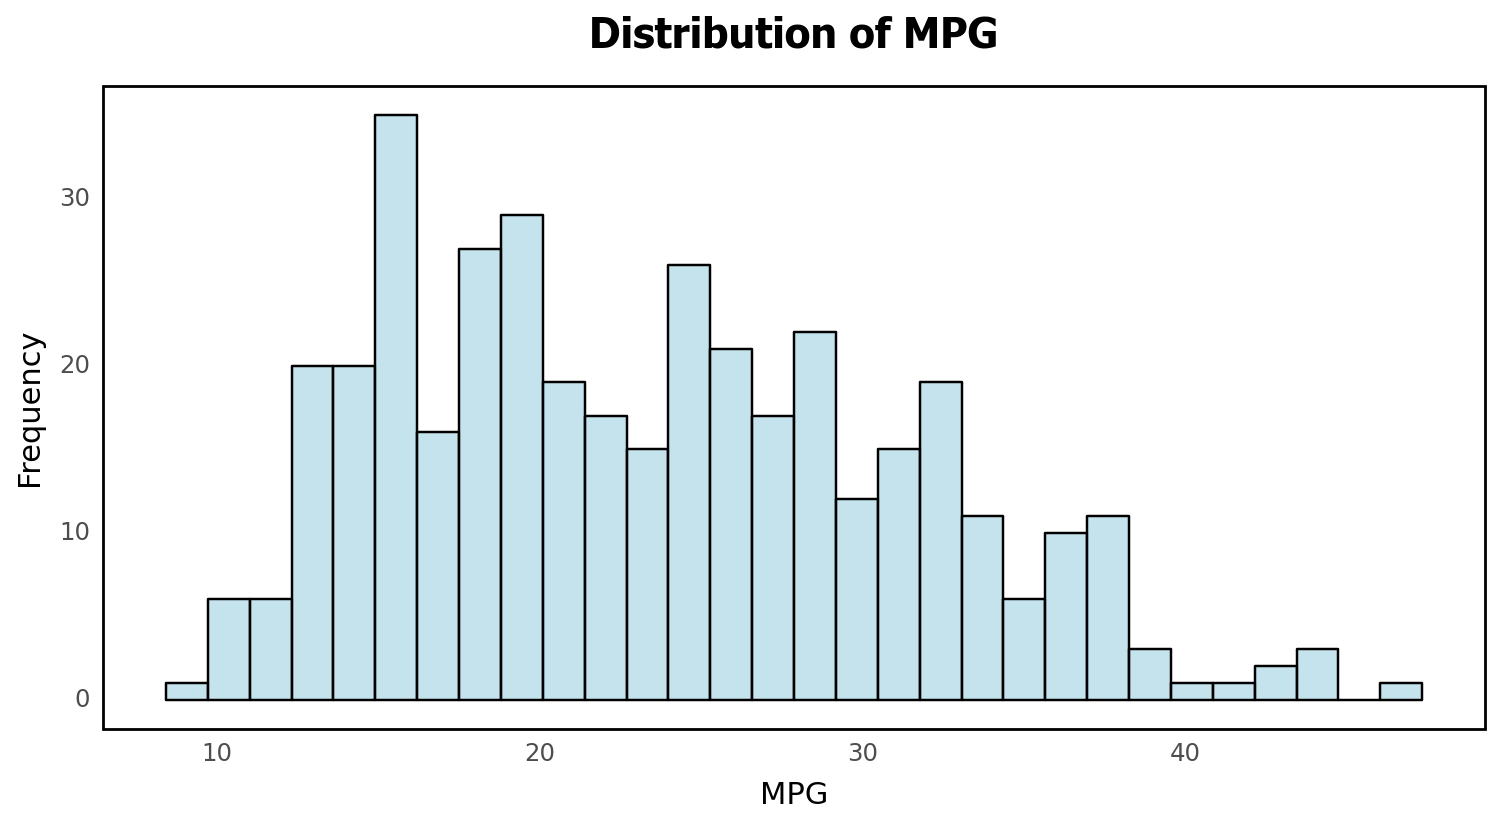

<Figure Size: (750 x 420)>

In [49]:
p = ggplot(mpg, aes(x='MPG')) + geom_histogram(fill='lightblue', bins=30, color='black', alpha=0.7) + theme_minimal() + theme(
    plot_title=element_text(size=15, family="Tahoma", face="bold", hjust=0.5),  # 居中标题
    panel_border=element_rect(color='black', fill=None, size=1),  # 明确柱体边框
    panel_grid_major=element_blank(),
    panel_grid_minor=element_blank()
)
p + labs(title="Distribution of MPG", x="MPG", y="Frequency")



(2)因为接下来的主体图要以"Displacement"为x轴绘图，于是利用箱线图查看是否有异常数据。首先是利用numpy将Displacement每隔50划一个区间；接着使用ggplot的geom_boxplot画图，这里使用axis_text_x将x轴稍旋转利于展示。

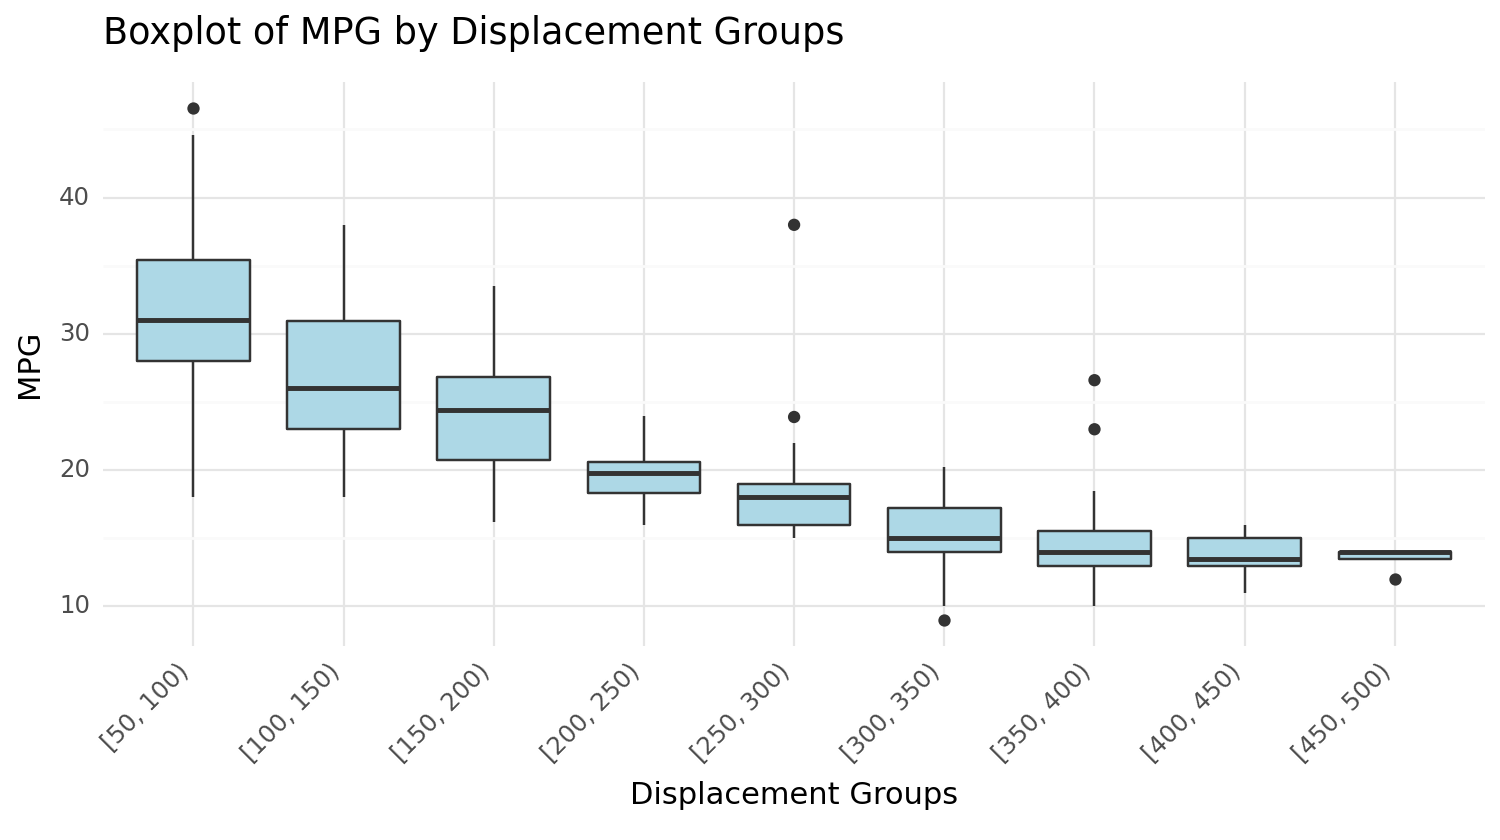

<Figure Size: (750 x 420)>

In [50]:
# 创建 Displacement 区间
mpg2 = mpg
mpg2['Displacement_Group'] = pd.cut(mpg2['Displacement'], bins=np.arange(0, 500, 50), right=False)
mpg2['Displacement_Group'] = mpg2['Displacement_Group'].cat.add_categories('[450, 500)')
mpg2['Displacement_Group'] = mpg2['Displacement_Group'].fillna('[450, 500)')

p = ggplot(mpg2, aes(x='Displacement_Group', y='MPG')) + geom_boxplot(fill='lightblue') + theme_minimal()
p + labs(title="Boxplot of MPG by Displacement Groups", x="Displacement Groups", y="MPG") + theme(axis_text_x=element_text(angle=45, hjust=1))


(3)由上面的箱线图能看到，多多少少有些点是异常的。但是因为本项目是考虑了3个影响因素的，所以可以适当忽略；所以这里只将Displacement在[250,300)，MPG大于30的这个异常点去除。去除过程和结果如下。

In [51]:
mpg = mpg[(mpg['Displacement'] < 250) | (mpg['Displacement'] > 300) | (mpg['MPG'] <= 30)]
print(mpg.shape[0])

391


## 4.ggplot的基本结构
根据mpg的Displacement和MPG画出基本结构

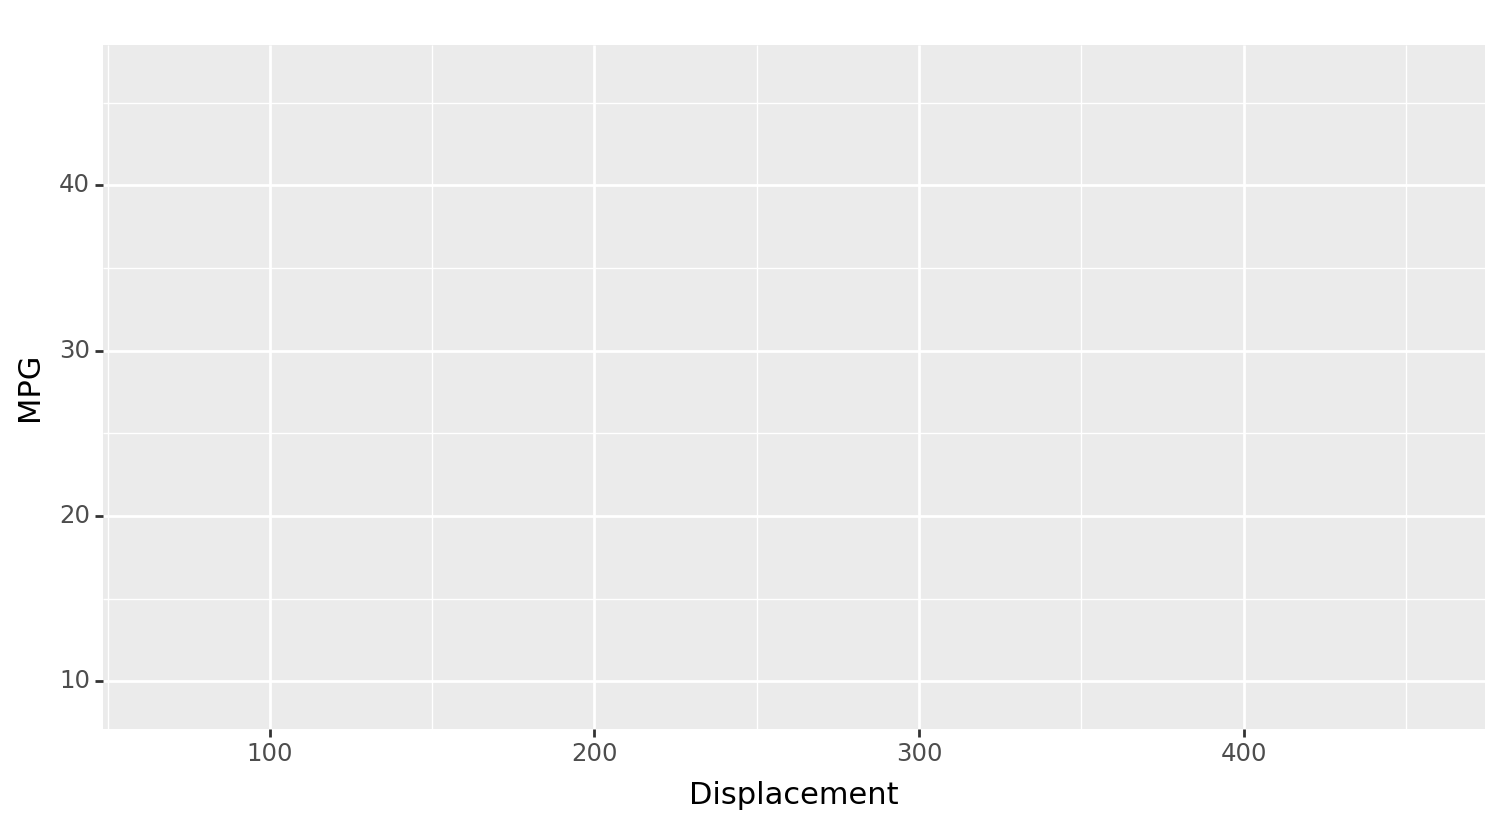

<Figure Size: (750 x 420)>

In [5]:
p = ggplot(mpg, aes("Displacement", "MPG"))
p


## 5.基本散点图
利用ggplot的geom_point()原语就可以

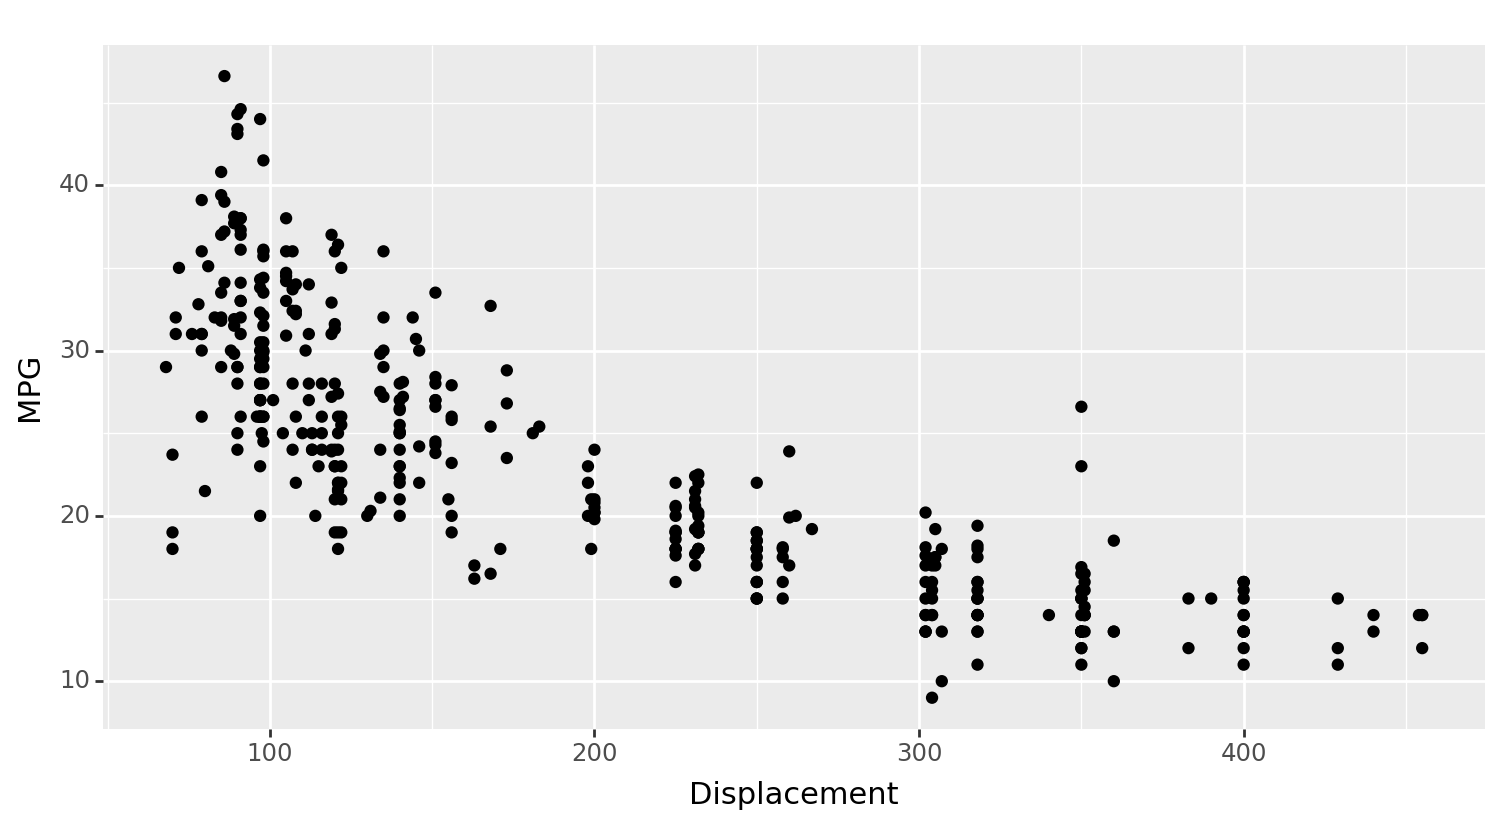

<Figure Size: (750 x 420)>

In [52]:
p = ggplot(mpg, aes("Displacement", "MPG")) + geom_point()
p

## 6.根据不同的Weight给数据点不同的大小
首先是利用ggplot把size设为'Weight'，并且用原语+scale_size(range=[1, 4])设置了点的大小

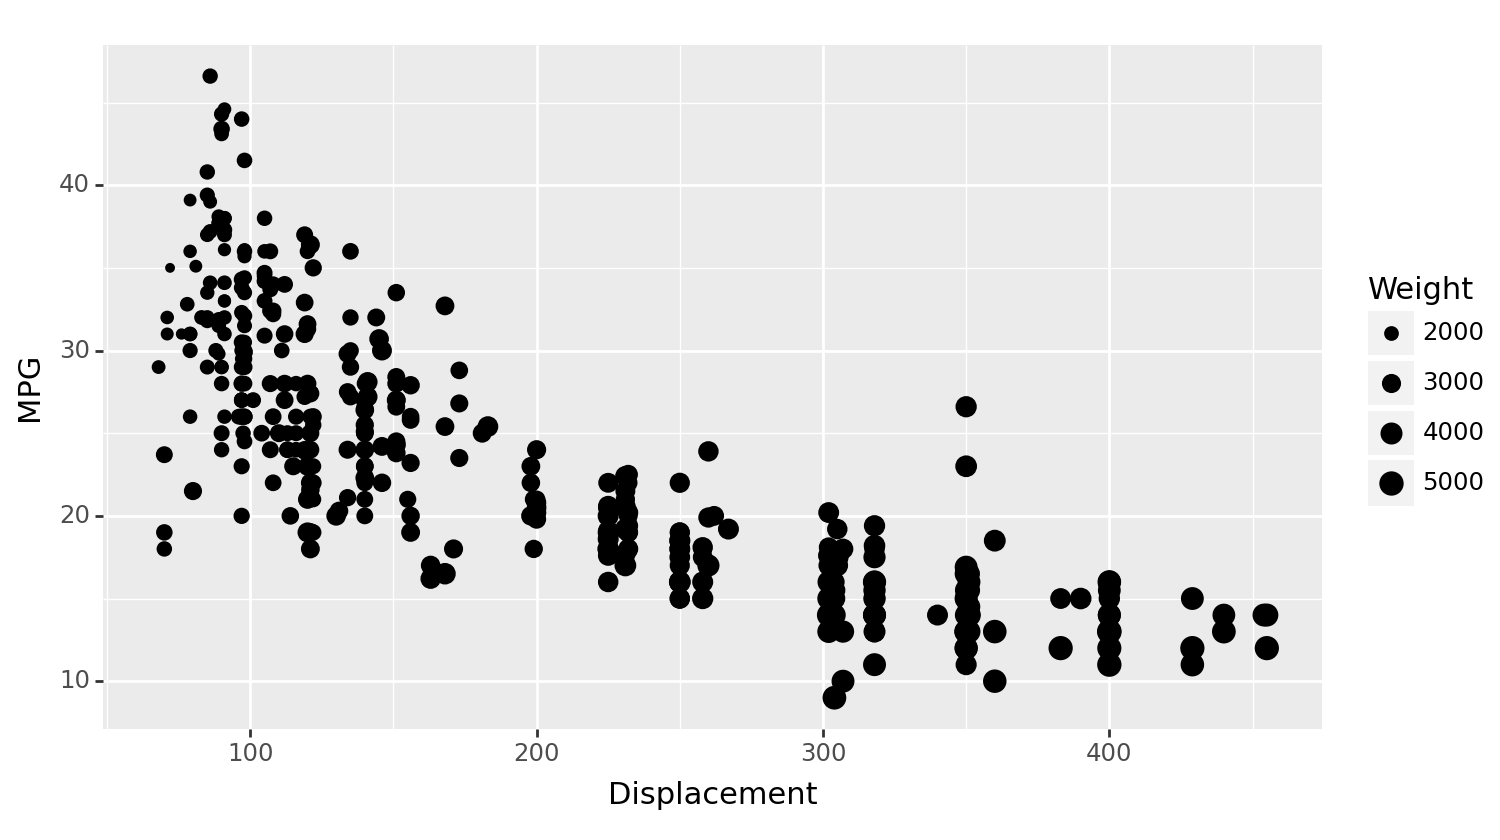

<Figure Size: (750 x 420)>

In [53]:
p = (
    ggplot(mpg, aes(x="Displacement", y="MPG", size="Weight")) 
    + geom_point()  
    + scale_size(range=[1, 4])
)
p

## 7.根据不同的Horsepower给数据点不同的渐变颜色
首先得将mpg里的Horsepower列转为连续数值型才能正确绘图(否则会因为离散数值无法映射到连续数值报错)
接着将ggplot的colour取为Horsepower的值


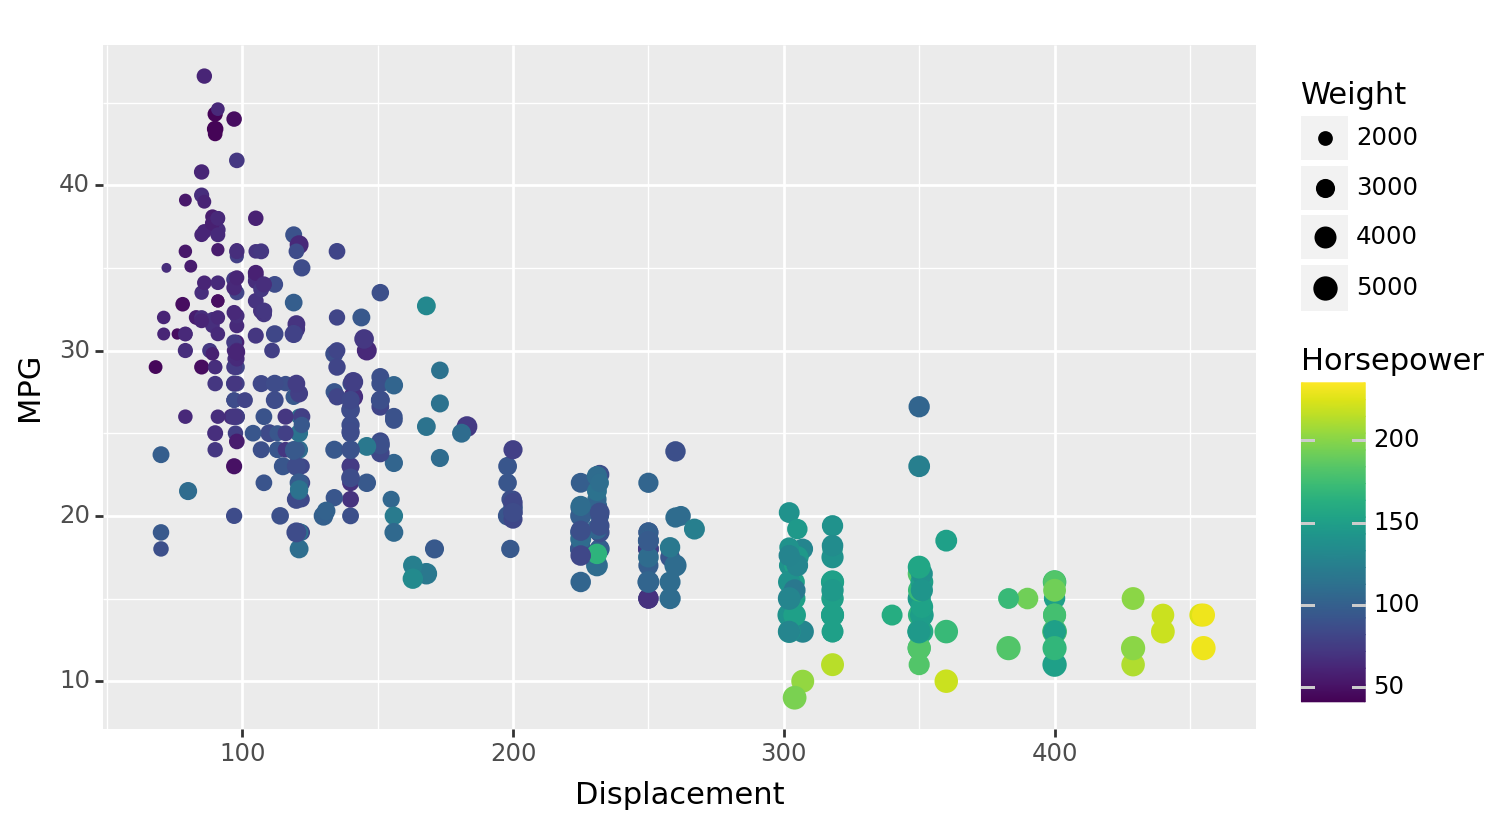

<Figure Size: (750 x 420)>

In [54]:
mpg['Horsepower'] = pd.to_numeric(mpg['Horsepower'], errors='coerce')
p = (
    ggplot(mpg, aes(x="Displacement", y="MPG", size="Weight",colour="Horsepower")) 
    + geom_point()  
    + scale_size(range=[1, 4])
)
p

## 8.调整坐标轴，设置标题
(1)首先是利用scale_x_continuous和scale_y_continuous设置坐标轴
(2)利用ggtitle设置标题

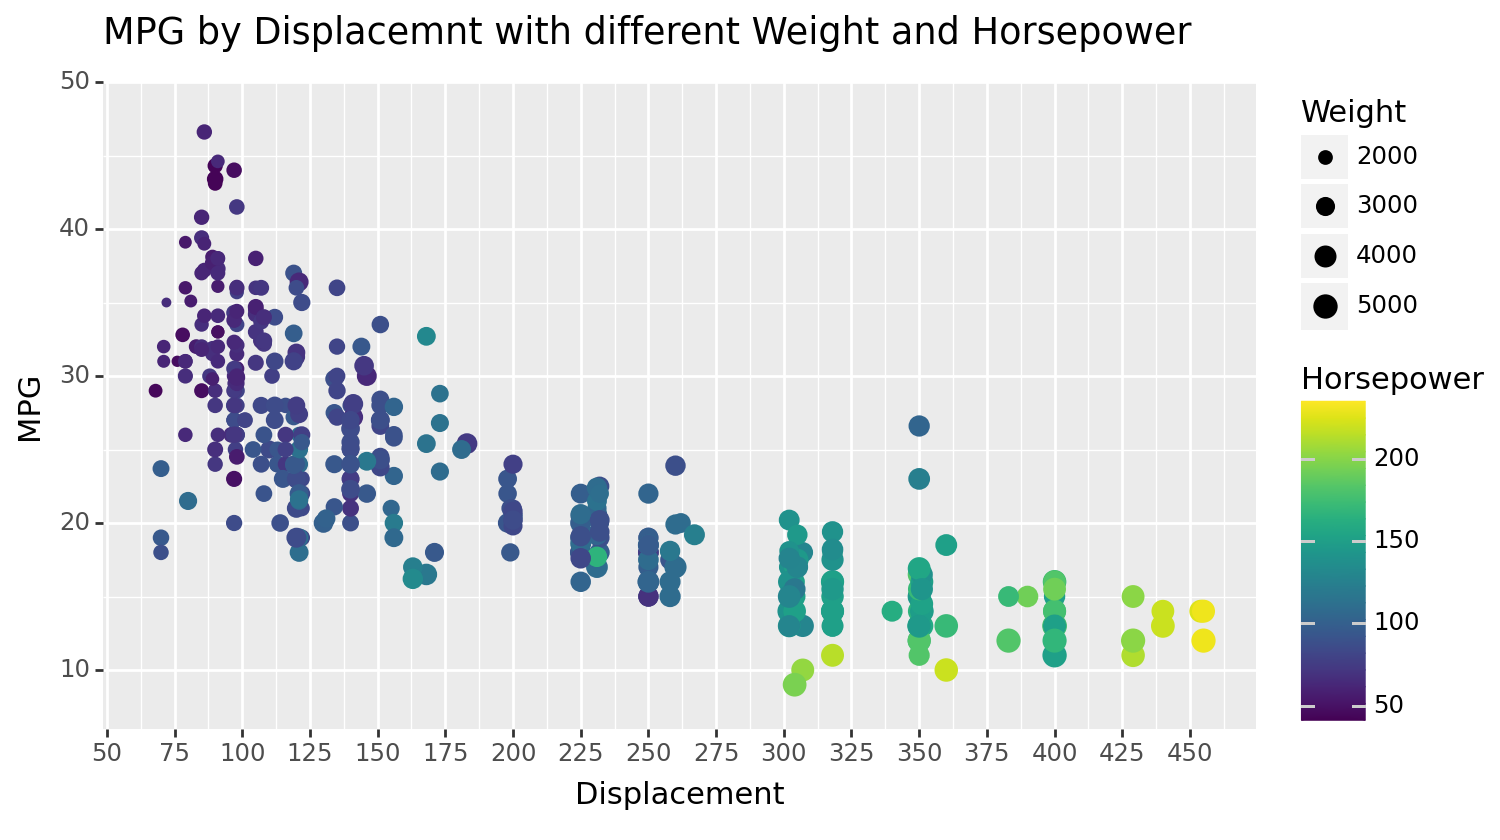

<Figure Size: (750 x 420)>

In [55]:
p = (
    ggplot(mpg, aes(x="Displacement", y="MPG", size="Weight",colour="Horsepower")) 
    + geom_point()  
    + scale_size(range=[1, 4])
    + scale_x_continuous(breaks=np .arange(0, 470, 25))
    + scale_y_continuous(limits= (8, 48))
    + ggtitle("MPG by Displacemnt with different Weight and Horsepower")
    + xlab("Displacement")
    + ylab("MPG")
)
p

## 9.调整主题，创建属于自己的风格
(1)使用theme_bw()设置白色主题

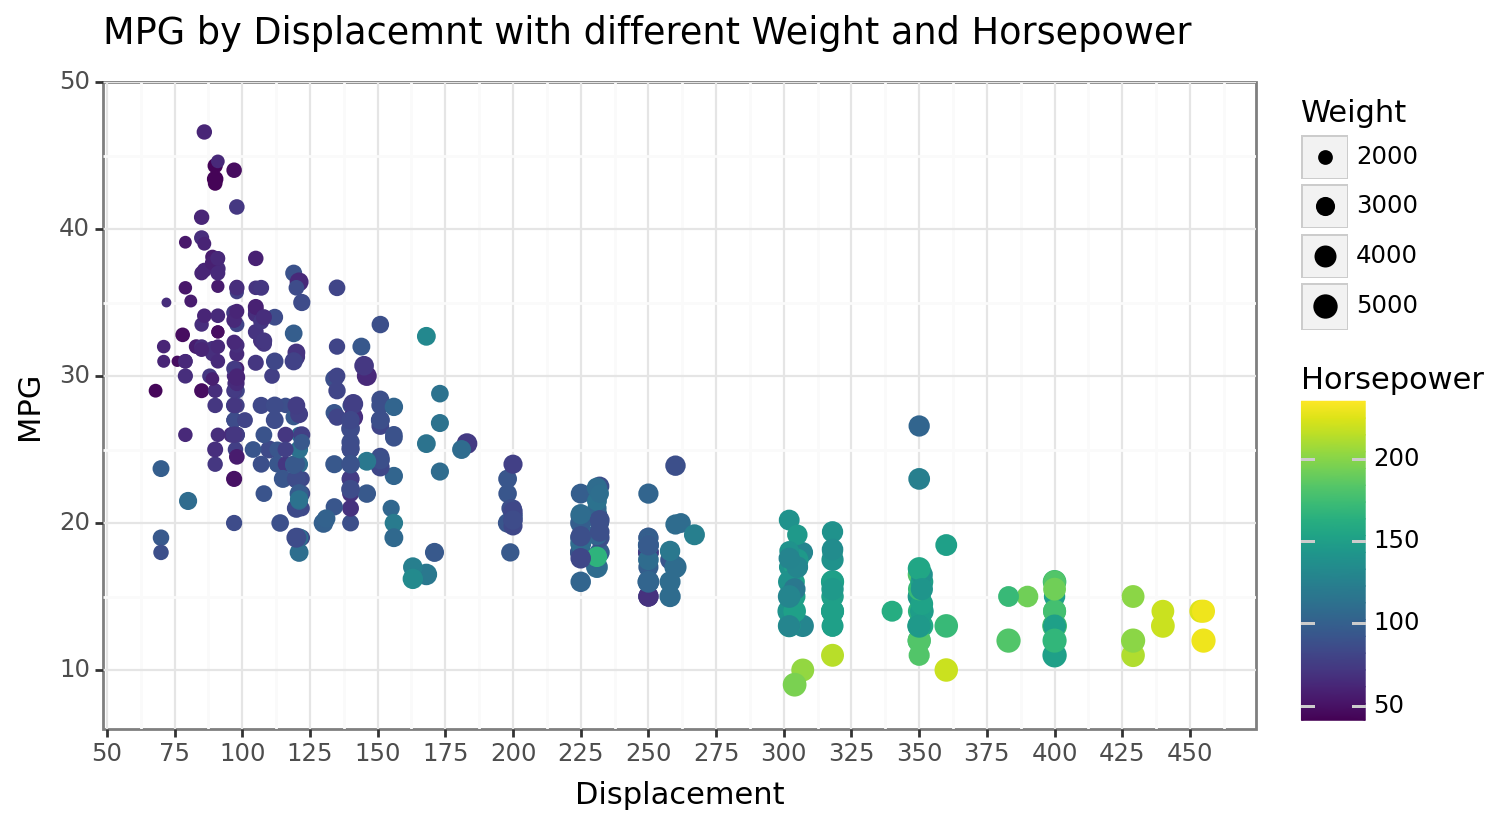

<Figure Size: (750 x 420)>

In [56]:
p = (
    ggplot(mpg, aes(x="Displacement", y="MPG", size="Weight",colour="Horsepower")) 
    + geom_point()  
    + scale_size(range=[1, 4])
    + scale_x_continuous(breaks=np .arange(0, 470, 25))
    + scale_y_continuous(limits= (8, 48))
    + ggtitle("MPG by Displacemnt with different Weight and Horsepower")
    + xlab("Displacement")
    + ylab("MPG")
    + theme_bw()
)
p

导入字体

In [57]:
import matplotlib.font_manager as fm
fpath = "DecimaMonoPro.otf"
title_text = fm .FontProperties(fname=fpath)
body_text = fm .FontProperties(fname=fpath)
title_text .set_size(18)
title_text .set_weight("bold")
body_text.set_size(12)

(2)将字体应用到ggplot中

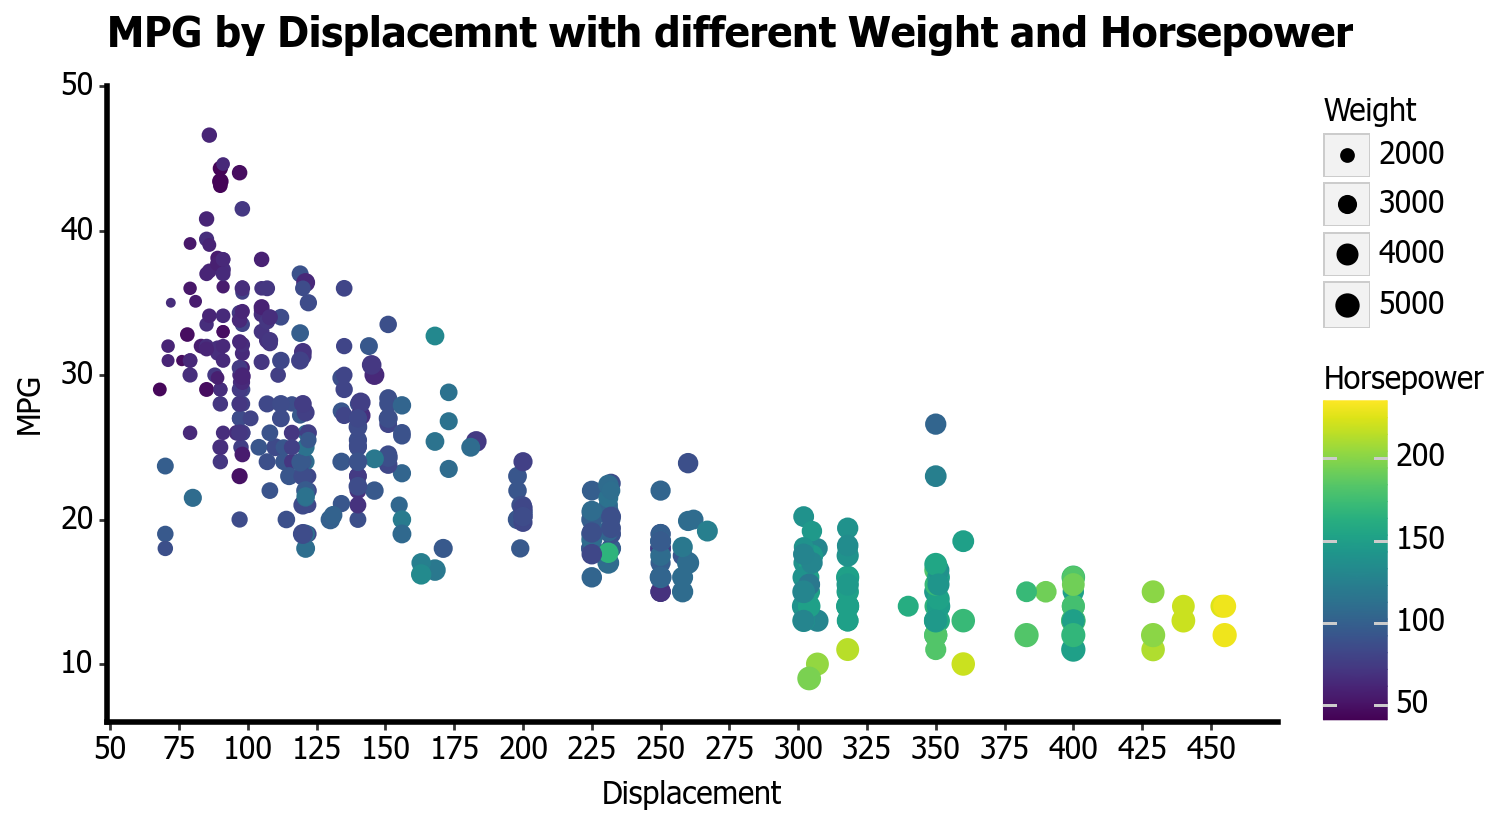

<Figure Size: (750 x 420)>

In [58]:
p = (
    ggplot(mpg, aes(x="Displacement", y="MPG", size="Weight",colour="Horsepower")) 
    + geom_point()  
    + scale_size(range=[1, 4])
    + scale_x_continuous(breaks=np .arange(0, 470, 25))
    + scale_y_continuous(limits= (8, 48))
    + ggtitle("MPG by Displacemnt with different Weight and Horsepower")
    + xlab("Displacement")
    + ylab("MPG")
    + theme_bw()
    +theme(
        axis_line_x=element_line(size=2, colour="black"),
        axis_line_y=element_line(size=2, colour="black"),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15, family="Tahoma",face="bold"),    #改变字体
        text=element_text(family="Tahoma", size=11), 
        axis_text_x=element_text(colour="black"),
        axis_text_y=element_text(colour="black"),
    )
)
p

## 10.分析相关系数
我们可以通过pandas数据类型自带的.corr()得到相关性矩阵，佐证我们的结论

In [65]:
correlation_matrix = mpg.corr()
print(correlation_matrix)

                   MPG  Displacement    Weight  Horsepower
MPG           1.000000     -0.805127 -0.832244   -0.778427
Displacement -0.805127      1.000000  0.932994    0.897257
Weight       -0.832244      0.932994  1.000000    0.864538
Horsepower   -0.778427      0.897257  0.864538    1.000000


## 11.结论
此项目采用MPG数据集，研究MPG和Displacement,Weight,Horsepower这三个因素之间的关系。从分析来看，MPG数据集分布较均匀，大多处于10-40之间；在排除缺失项和异常项后，共计入391份有效样本。
<br>
分析主要基于ggplot绘制的散点图，以Displacement作x轴，MPG作y轴；数据点的大小标识不同Weight；数据点颜色标识不同Horsepower；最后还计算了各自的相关性。
<br>
从结果上来看，Displacement,Weight,Horsepower都与MPG呈负相关，其中的Weight相关性最大。简单地来说，一辆汽车Displacement越小，Weight越小，Horsepower越小；就能得到越大的MPG。这也和我们生活中的认知相符，负载更大、马力更大的车，如高速的赛车，是更耗油的；燃油效率是更低的。